In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Overview of Discrete Fourier Transform

In [142]:
sizesig = 10000
b = 2*np.pi*sizesig/100
x = np.linspace(0,b, sizesig)
sig = np.cos(x) + np.cos(40*x)

In [143]:
a = fft(sig)

In [144]:
spec = np.abs(a)

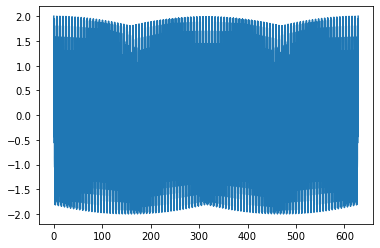

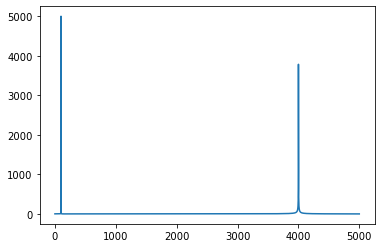

In [145]:
plt.plot(x, sig)
plt.show()
plt.plot(spec[:sizesig//2])
plt.show()

## DFT for estimating a signal's FT
---
### DFT relation with frequencies

Discrete fourier transform do not immediately translate into frequencies. Since DFT is defined as 
$$
\large \widehat{x_k} = \sum\limits_{k=0}^{n-1} x_k e^{-2i\pi kj \over n}
$$

We have  the relation 
$$
\large \widehat{x\left({j\over b}\right)} \approx \frac{b}{n}\sum\limits_{k=0}^{n-1} x_k e^{-2i\pi kj \over n} = \frac{b}{n} DFT(x_k)_j
$$

then which frequencies $\hat{x_k}$ represents depends on the size of the signal and its domain; in other words, its sampling rate and the signal size.

In our case, we sample `sigsize` elements in [0,b], taking the j-th elemetn in the DFT of $x_k$ will give us $\frac{n}{b} \widehat{x\left({j\over b}\right)}$; This implies that to obtain the frequencies, we only need to divide the index by the size of the signal domain.

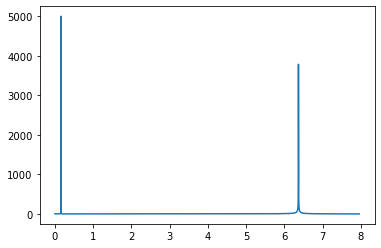

(6.0, 6.6)

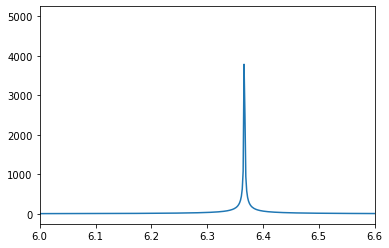

In [146]:
freq = np.arange(0, sizesig//2) / b
plt.plot(freq, spec[:sizesig//2])
plt.show()
plt.plot(freq, spec[:sizesig//2])
plt.xlim((6.0, 6.6))

### How to increase the resolution of the DFT
It is important to notice that augmenting the sampling rate only adds frequency bins but does not make the dft smoother.

The reason lies in the precedent approximation formula. Making $j$ go higher (increasing the sampling rate) does not change $b$ and thus only add to the range of frequencies.

Fixing those two to be in a ratio and increasing one leads to a smoother dft. The chosen ratio will inform the extent of the focused frequencies. THUS, playing with sampling and domain size is **mandatory** to characterize a signal well. (certain freq will not show on a chosen signal size).

For a fixed signal, the domain size can be artificially augmented by padding with zeros of making the function periodic by repetition (can lead to better result but also artificial frequencies).